In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelors,Software/Developer,5,90000.0,UK,White
1,28,Female,Masters,Data Analyst/Scientist,3,65000.0,USA,Hispanic
2,45,Male,PhD,Manager/Director/VP,15,150000.0,Canada,White
3,36,Female,Bachelors,Sales,7,60000.0,USA,Hispanic
4,52,Male,Masters,Manager/Director/VP,20,200000.0,USA,Asian


## Data processiong for modelling

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   int64  
 5   Salary               6698 non-null   float64
 6   Country              6698 non-null   object 
 7   Race                 6698 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 418.8+ KB


In [112]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


In [113]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,1,0,11,5,90000.0,3,9
1,28,0,2,1,3,65000.0,4,5
2,45,1,3,5,15,150000.0,1,9
3,36,0,0,10,7,60000.0,4,5
4,52,1,2,5,20,200000.0,4,1


<Axes: >

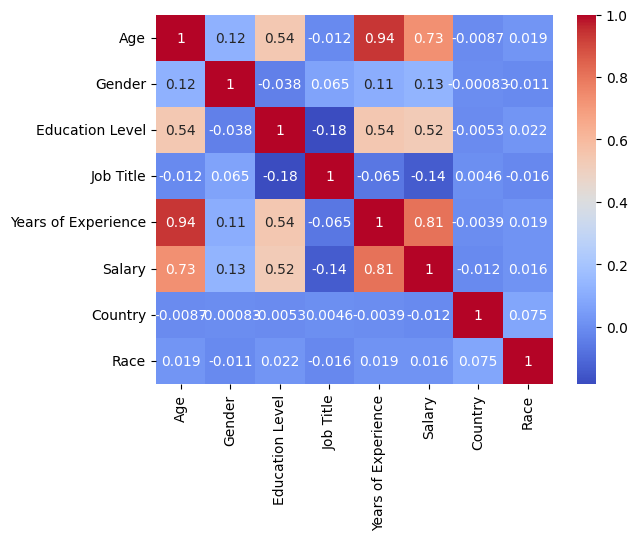

In [114]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

- Age, years of experiance and Educational level are highly correlated to salary

### Linear Regression

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race']]
y = df['Salary']

In [117]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = model.predict(X_test)

In [120]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 892338766.37
R^2 Score: 0.69


### Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [122]:
# Make predictions
dt_pred = model.predict(X_test)

In [123]:
# Evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
conf_matrix = confusion_matrix(y_test, dt_pred)
class_report = classification_report(y_test, dt_pred)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6492537313432836
Confusion Matrix:
 [[ 0  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  2  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  0]]


- since the accuracy is pretty low, I am doing hypertuning

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")


Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.66


### Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest MSE: 152328491.86770138
Random Forest R² Score: 0.9465787589477788


In [126]:
results_df = pd.DataFrame({
    'Actual Salary': y_test,
    'Predicted Salary': y_pred_rf
})

results_df.head(10)

,Actual Salary,Predicted Salary
1881,150000.0,149243.645833
2627,75969.0,77403.760000
496,100000.0,100000.000000
5968,60000.0,60000.000000
4104,80000.0,81020.833333
1039,190000.0,194670.833333
4844,72000.0,72654.000000
6611,55000.0,56630.238095
1084,195000.0,196402.297619
5525,130000.0,131661.369048


- Random Forest shown higher accuracy among all 3 models with 94 percent accuracy

# Conclusion

### Choose Model - Random Forest with accuracy of 94.65 %

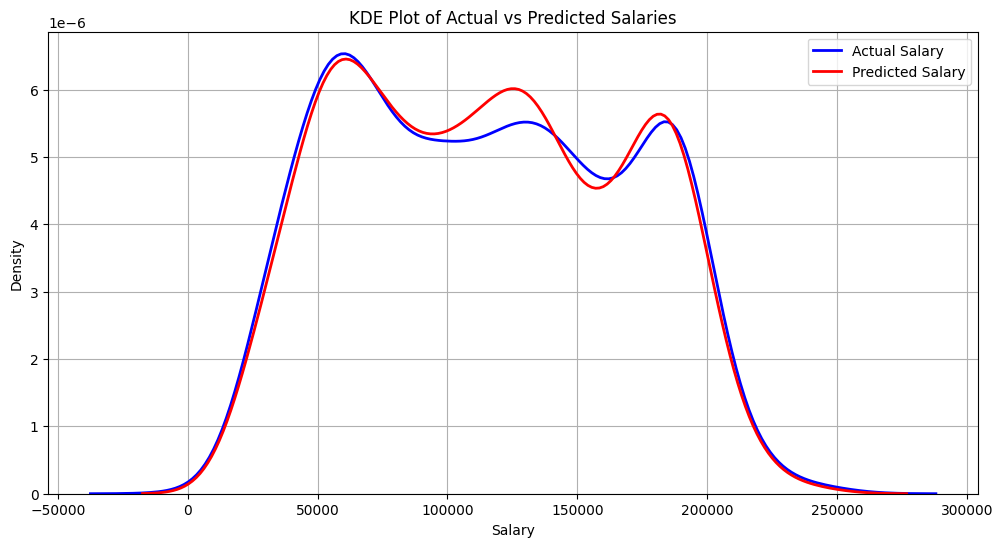

In [127]:
plt.figure(figsize=(12, 6))
sns.kdeplot(results_df['Actual Salary'], color='blue', label='Actual Salary', linewidth=2)
sns.kdeplot(results_df['Predicted Salary'], color='red', label='Predicted Salary', linewidth=2)

plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs Predicted Salaries')
plt.legend()
plt.grid(True)
plt.show()